In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
import datetime

In [2]:
managed_cluster_df = pd.read_csv('./datasets/managed_clusters.csv')

In [4]:
hub_cluster_df = pd.read_csv('./datasets/hub_cluster.csv')

In [807]:
managed_cluster_df.shape, hub_cluster_df.shape

((3860, 1), (3180, 2))

In [ ]:
cpu_ts =  pd.read_csv('/Users/sponnur/PycharmProjects/pythonProject1/cpu_usage_2022_03_25_35_15m.csv')

In [693]:
memo_ts = pd.read_csv('/Users/sponnur/PycharmProjects/pythonProject1/mem_usage_2022_03_25_35_15m.csv')

In [757]:
api_server_count_ts = pd.read_csv('/Users/sponnur/PycharmProjects/pythonProject1/api_server_count_2022_03_25_35_15m.csv')

In [9]:
cpu_ts.head()

,timestamp,cpu_usage,cluster_id
0,2022-03-25 19:30:00,23.985167,01d1e513-9210-4099-967f-6dc13a7b4cc4
1,2022-03-25 19:45:00,16.995161,01d1e513-9210-4099-967f-6dc13a7b4cc4
2,2022-03-25 20:00:00,31.195973,01d1e513-9210-4099-967f-6dc13a7b4cc4
3,2022-03-25 20:15:00,19.654904,01d1e513-9210-4099-967f-6dc13a7b4cc4
4,2022-03-25 20:30:00,18.065067,01d1e513-9210-4099-967f-6dc13a7b4cc4


Making the cluster_id as index in managed cluster to perform inner join on that column

In [8]:
managed_cluster_df.set_index('_id',inplace=True)

In [16]:
cpu_ts_managed = cpu_ts.join(managed_cluster_df,on='cluster_id',how='inner')

In [695]:
memo_ts_managed = memo_ts.join(managed_cluster_df,on='cluster_id',how='inner')

In [758]:
api_ts_managed = api_server_count_ts.join(managed_cluster_df,on='cluster_id',how='inner')

Making the cluster_id as index in hub cluster to perform inner join on that column

In [20]:
hub_cluster_df.set_index('_id',inplace=True)

In [21]:
cpu_ts_hub_cluster = cpu_ts.join(hub_cluster_df,on='cluster_id',how='inner')

In [789]:
from collections import Counter
vendor_dist = dict(Counter(cpu_ts_hub_cluster.drop_duplicates(['cluster_id','vendor'],keep='first')['vendor']))

In [816]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

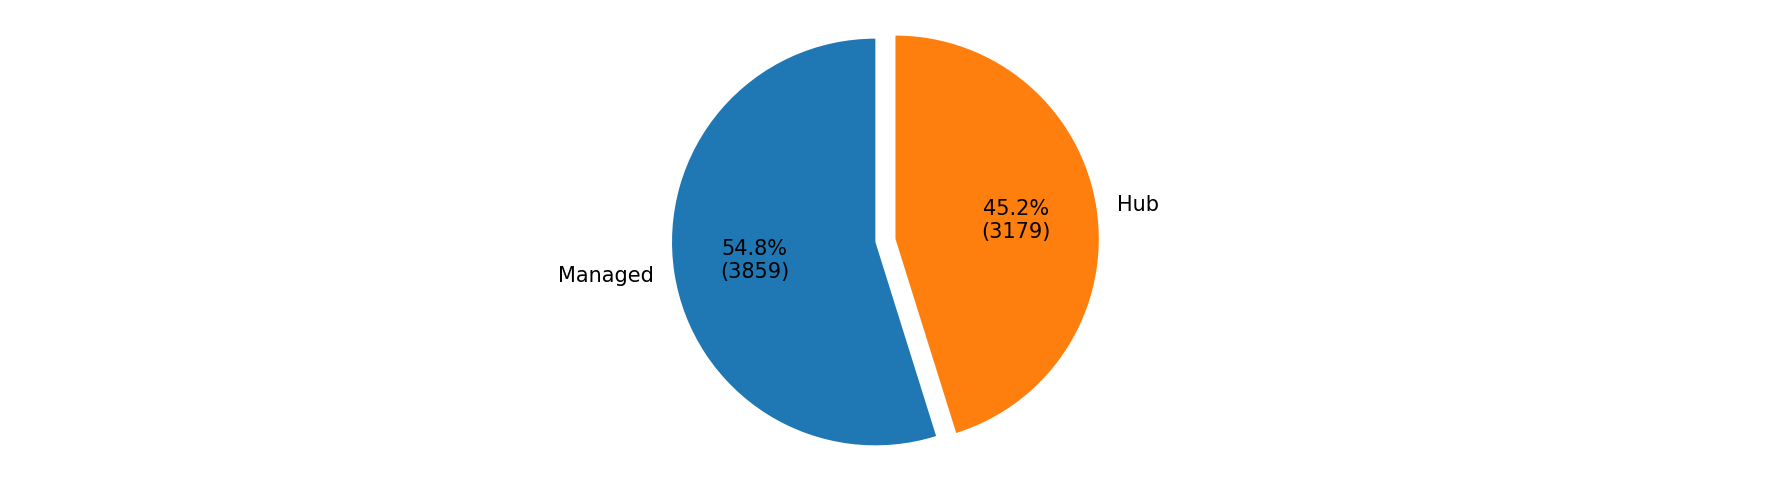

In [817]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(15, 4), dpi=150)
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
plt.pie([3860,3180], explode=explode, labels=['Managed','Hub'], autopct= lambda pct: func(pct, [3860,3180]),
        shadow=False, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




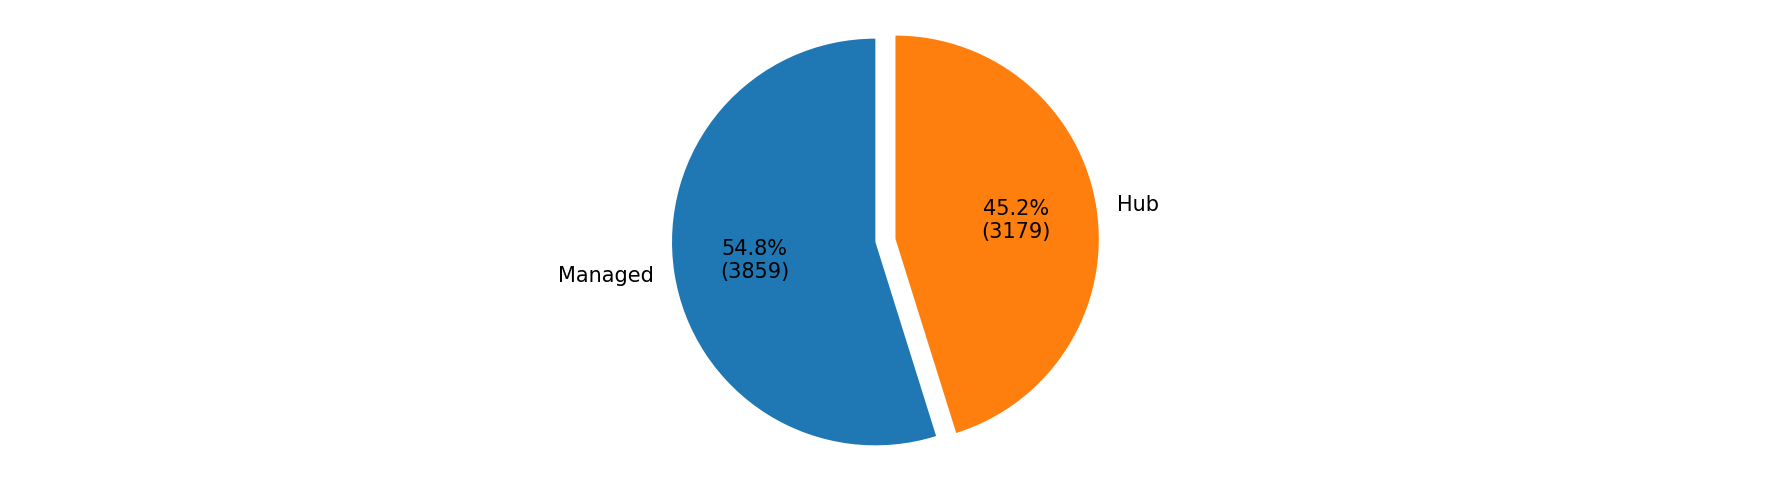

In [817]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(15, 4), dpi=150)
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
plt.pie([3860,3180], explode=explode, labels=['Managed','Hub'], autopct= lambda pct: func(pct, [3860,3180]),
        shadow=False, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




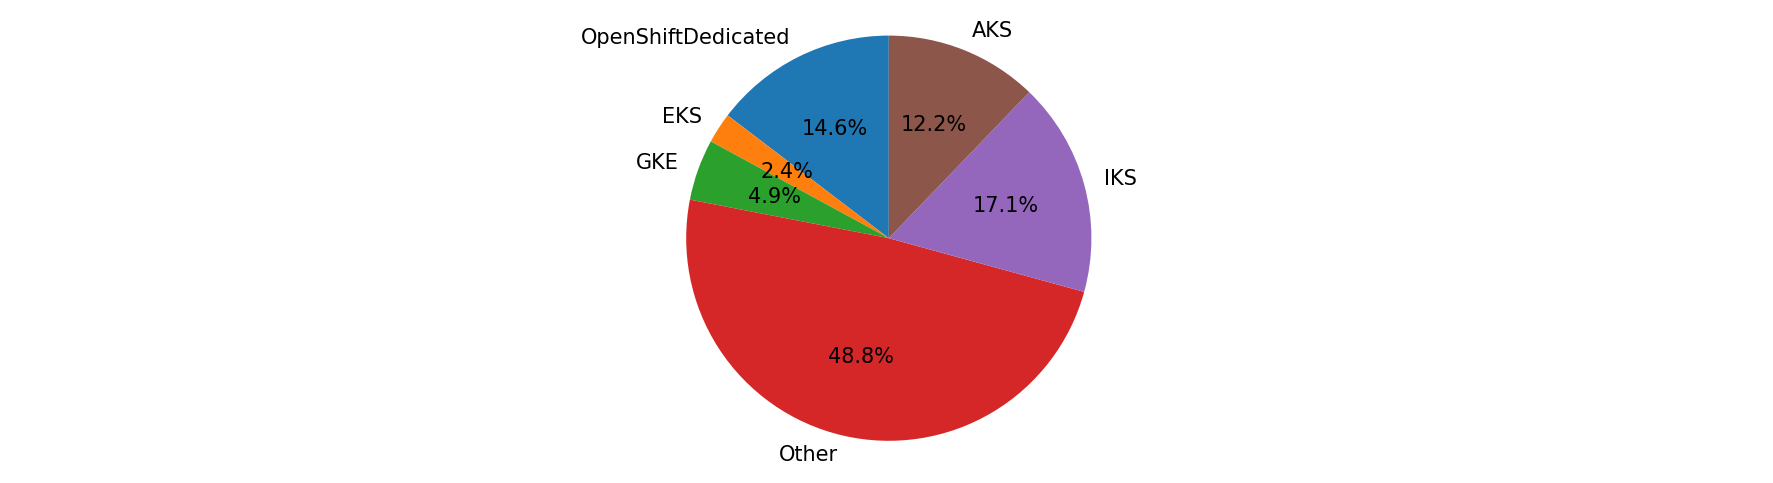

In [797]:
plt.figure(figsize=(15, 4), dpi=150)
explode = (0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#fig1, ax1 = plt.subplots()
values = list(vendor_dist.values())
labels = list(vendor_dist.keys())
plt.pie(values[1:], explode=explode, labels=labels[1:], autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [696]:
memo_ts_hub_cluster = memo_ts.join(hub_cluster_df,on='cluster_id',how='inner')

In [759]:
api_ts_hub_cluster = api_server_count_ts.join(hub_cluster_df,on='cluster_id',how='inner')

In [22]:
cpu_ts_hub_cluster.head()

,timestamp,cpu_usage,cluster_id,vendor,is_managed
2721,2022-03-25 19:30:00,13.885238,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2722,2022-03-25 19:45:00,13.991905,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2723,2022-03-25 20:00:00,14.992952,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2724,2022-03-25 20:15:00,14.167333,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2725,2022-03-25 20:30:00,12.761905,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0


In [699]:
memo_ts_hub_cluster.head()

,timestamp,mem_usage,cluster_id,vendor,is_managed
2727,2022-03-25 20:45:00,154987569152,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2728,2022-03-25 21:00:00,153868214272,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2729,2022-03-25 21:15:00,155742699520,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2730,2022-03-25 21:30:00,150773366784,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2731,2022-03-25 21:45:00,150698995712,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0


Unique vendors observed in hub cluster

In [24]:
cpu_ts_hub_cluster['vendor'].unique()

array(['OpenShift', 'OpenShiftDedicated', 'EKS', 'GKE', 'Other', 'IKS',
       'AKS'], dtype=object)

In [25]:
len(cpu_ts_hub_cluster['cluster_id'].unique())

3159

In [29]:
cpu_ts_hub_cluster['cluster_ts_size'] = cpu_ts_hub_cluster.groupby('cluster_id')['cluster_id'].transform('count')

The time series size of each cluster is inconsistent 

In [691]:
cpu_ts_hub_cluster['cluster_ts_size'].describe()

count    2.430255e+06
mean     2.671788e+03
std      1.069392e+03
min      1.000000e+00
25%      2.141000e+03
50%      3.376000e+03
75%      3.395000e+03
max      3.397000e+03
Name: cluster_ts_size, dtype: float64

Converting the type of timestamp from object to datetime object

In [33]:
cpu_ts_hub_cluster['timestamp'] =  pd.to_datetime(cpu_ts_hub_cluster.timestamp, infer_datetime_format=True)
cpu_ts_managed['timestamp'] = pd.to_datetime(cpu_ts_managed.timestamp, infer_datetime_format=True)

In [704]:
memo_ts_hub_cluster['timestamp'] =  pd.to_datetime(memo_ts_hub_cluster.timestamp, infer_datetime_format=True)
memo_ts_managed['timestamp'] = pd.to_datetime(memo_ts_managed.timestamp, infer_datetime_format=True)

In [760]:
api_ts_hub_cluster['timestamp'] =  pd.to_datetime(api_ts_hub_cluster.timestamp, infer_datetime_format=True)
api_ts_managed['timestamp'] = pd.to_datetime(api_ts_managed.timestamp, infer_datetime_format=True)

In [38]:
cpu_ts_hub_cluster['date'] = cpu_ts_hub_cluster['timestamp'].dt.date

In [51]:
cpu_ts_managed['date'] = cpu_ts_managed['timestamp'].dt.date

In [705]:
memo_ts_managed['date'] = memo_ts_managed['timestamp'].dt.date
memo_ts_hub_cluster['date'] = memo_ts_hub_cluster['timestamp'].dt.date

In [761]:
api_ts_managed['date'] = api_ts_managed['timestamp'].dt.date
api_ts_hub_cluster['date'] = api_ts_hub_cluster['timestamp'].dt.date

Dates of the current dataset are from 25th of March till 29th of May

In [242]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['timestamp'] == '2022-04-29 00:00:00']

,timestamp,cpu_usage,cluster_id,vendor,is_managed,cluster_ts_size,date,cluster_per_day_ts_size
76461256,2022-04-29,10.390172,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0,3390,2022-04-29,79
76475986,2022-04-29,25.633029,01a754f2-8cdb-4f28-b2e1-8fe592d5c1e1,OpenShift,0,3395,2022-04-29,79
76477051,2022-04-29,8.628095,01ca0384-73e4-4948-a8d2-8f2e3629542b,OpenShift,0,3390,2022-04-29,79
76480729,2022-04-29,33.217635,02469314-0185-44e0-96c4-53a370b270e1,OpenShift,0,3394,2022-04-29,79
76484013,2022-04-29,6.109429,029099e1-c965-46a9-8af4-2a561b2e6f36,OpenShift,0,3382,2022-04-29,79
...,...,...,...,...,...,...,...,...
77314974,2022-04-29,8.665238,5e961335-5948-42d1-b03f-91ca62fbfda7,OpenShift,0,17,2022-04-29,1
77398656,2022-04-29,8.946571,67f78aa1-e804-417e-ba21-0bca766c63e1,OpenShift,0,14,2022-04-29,13
77849800,2022-04-29,5.733524,9a2caddc-14f7-4a2e-89ec-27c5044c7da6,OpenShift,0,89,2022-04-29,79
78201598,2022-04-29,4.094952,c1033ec7-ee63-4574-a49a-a16f0f4928d4,OpenShift,0,86,2022-04-29,79


calculating per day size of the timeseries to handle inconsistency

In [41]:
cpu_ts_hub_cluster['cluster_per_day_ts_size'] = cpu_ts_hub_cluster.groupby(['cluster_id','date'])['cluster_id'].transform('count')

In [46]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].cluster_per_day_ts_size.describe()

count    3390.000000
mean       96.019469
std         6.315094
min        18.000000
25%        97.000000
50%        97.000000
75%        97.000000
max        97.000000
Name: cluster_per_day_ts_size, dtype: float64

In [138]:
single_day_managed_cluster_df = cpu_ts_managed.loc[cpu_ts_managed['date'] == datetime.date(2022, 3, 26)]

In [145]:
single_day_managed_cluster_df.set_index('timestamp',inplace=True)

Single Day Time Series Plots of different clusters 

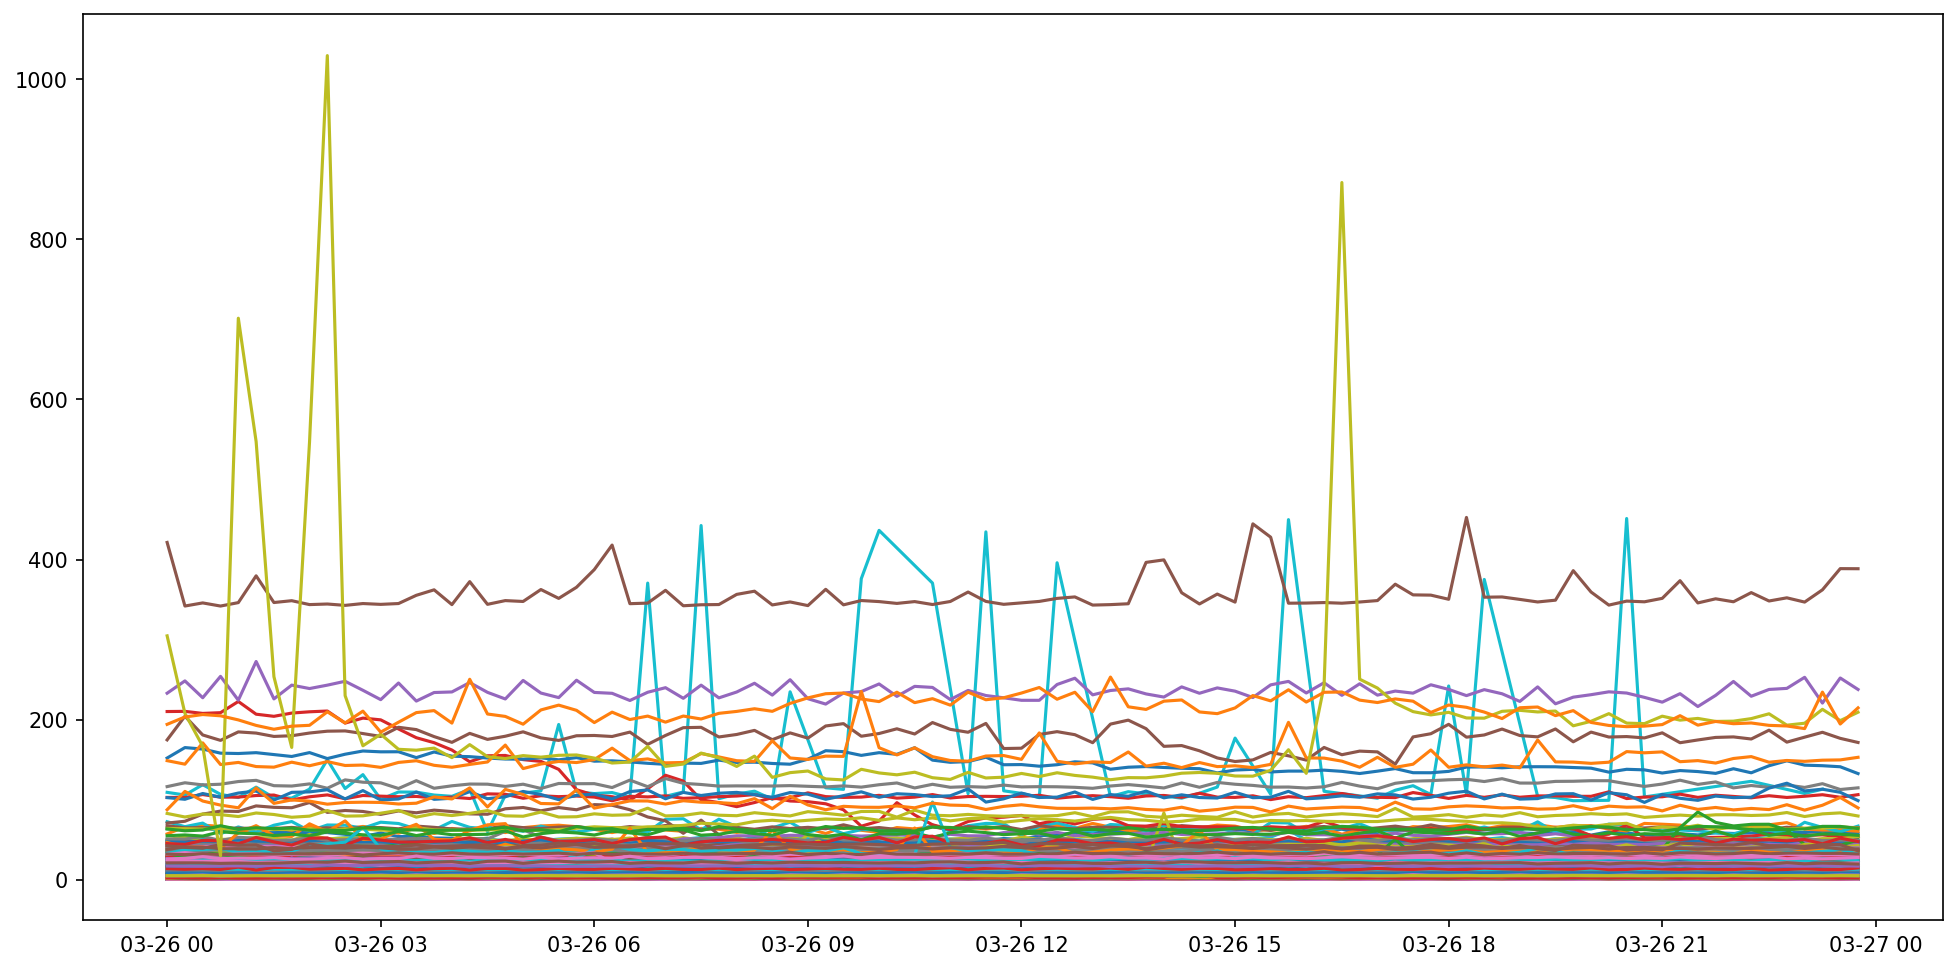

In [146]:
plt.figure(figsize=(16, 8), dpi=150)
for cluster_id, df in single_day_managed_cluster_df.groupby('cluster_id'):
    plt.plot(df['cpu_usage'],label='line')
plt.show()

In [470]:
single_cluster_df = cpu_ts_managed.loc[cpu_ts_managed['cluster_id'] == '00074511-2e63-4d75-9937-3495d5595b4f']

In [211]:
from impyute.imputation.cs import mice
from impyute.imputation.ts import locf
from impyute.imputation.ts import moving_window
from numpy import nan

In [196]:
a = [[1.0,2.0,np.nan]]
a = np.array(a)

In [322]:
b = [[-1.24940, -1.38673, -0.03214945, 0.08255145, -0.007415],
[ 2.14662, 0.32758 , -0.82601414, 1.78124027, 0.873998], [1.0,nan,1.0,2.0, 1.680435], [ 0.40975, 1.067599, 0.29152388, -1.70160145, -0.565226], [nan, nan, 2.04004377, 0.16664863, -0.010677]]
b = np.array(b)

In [313]:
c = [[nan, nan, -0.03214945, nan, -0.007415]]
c = np.array(c)

In [326]:
c_result = locf(b,axis=0)

In [324]:
moving_window(b,wsize=3)

array([[-1.2494    , -1.38673   , -0.03214945,  0.08255145, -0.007415  ],
       [ 2.14662   ,  0.32758   , -0.82601414,  1.78124027,  0.873998  ],
       [ 1.        ,  1.        ,  1.        ,  2.        ,  1.680435  ],
       [ 0.40975   ,  1.067599  ,  0.29152388, -1.70160145, -0.565226  ],
       [ 2.04004377,  2.04004377,  2.04004377,  0.16664863, -0.010677  ]])

In [308]:
test_array = cpu_ts_hub_cluster.loc[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56']['cpu_usage'].to_list()

In [74]:
from scipy.stats import kurtosistest

In [86]:
kurtosistest(test_array)

KurtosistestResult(statistic=29.91934823204776, pvalue=1.102486609867157e-196)

In [76]:
from scipy.stats import kurtosis

In [92]:
kurtosis([0,1,2])

-1.5

In [ ]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].groupby('cluster_id').rolling('D').avg()

In [99]:
new_df = cpu_ts_managed.copy(deep=True)

In [100]:
new_df.set_index('timestamp',inplace=True)

In [107]:
new_df[new_df['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].groupby('cluster_id')['cpu_usage'].rolling('D').sum()

Series([], Name: cpu_usage, dtype: float64)

Infering the Dates

In [114]:
new_df['date'] = pd.to_datetime(new_df['date'], format='%Y-%m-%d')

Generating all the indexes that we need between our date range

In [349]:
indexes = pd.date_range('2022-03-26 00:00:00','2022-04-30 00:00:00',freq='15T')

In [351]:
indexes = indexes[:-1]

In [277]:
len(indexes)

3360

Since we have 35 days worth of data, we should have 35 * 96 a total of 3360 indexes per day

In [279]:
35*96

3360

In [425]:
from pandas.core.tools.datetimes import _guess_datetime_format_for_array

In [428]:
_guess_datetime_format_for_array(['2022-03-25 19:30:00'])

'%Y-%m-%d %H:%M:%S'

Inferring the date format

In [462]:
indexes_df = pd.DataFrame(indexes,columns=['timestamp'])

Testing Logic with a single cluster

In [473]:
single_cluster_df = single_cluster_df.drop_duplicates(['timestamp'],keep='first')

In [474]:
len(single_cluster_df.timestamp.unique())

2537

In [475]:
single_cluster_df.shape

(2537, 5)

In [476]:
len(single_cluster_df.index.unique())

2537

In [478]:
single_cluster_df.set_index('timestamp',inplace=True)

In [454]:
single_cluster_df[single_cluster_df['cpu_usage'].notnull()].shape

(2537, 4)

Since the indexes start from March 26th we are dropping March 25th day Records, that is why we observe inconsistency

In [574]:
joined_df = indexes_df.join(single_cluster_df,on='timestamp',how='left')[['timestamp','cpu_usage']]

In [577]:
joined_df_2 = joined_df.copy(deep=True)

In [581]:
joined_df_2['cpu_usage'] = c_result
joined_df_2['cluster_id'] = 113

In [483]:
joined_df[joined_df['cpu_usage'].isnull()].shape

(841, 3)

In [501]:
new_np = joined_df.to_numpy().reshape(1,3360)

In [560]:
np.unique(np.isnan(c_result))

array([False])

In [502]:
cluster_metrics = np.empty(shape=(0,3360))

In [503]:
cluster_metrics = np.concatenate([cluster_metrics,new_np],axis=0)

In [504]:
cluster_metrics.shape

(1, 3360)

In [576]:
c_result = locf(cluster_metrics,axis=0).reshape(3360,1)

In [525]:
c_result2 = moving_window(cluster_metrics,nindex=1,wsize=21).reshape(1,3360)

In [531]:
cluster_metrics.reshape(-1,1).shape

(3360, 1)

In [589]:
managed_cluster_full_data = pd.DataFrame(columns=['timestamp','cpu_usage','cluster_id'])

In [609]:
hub_cluster_full_data = pd.DataFrame(columns=['timestamp','cpu_usage','cluster_id'])

In [716]:
managed_cluster_memo_full_data = pd.DataFrame(columns=['timestamp','mem_usage','cluster_id'])

In [717]:
hub_cluster_memo_full_data = pd.DataFrame(columns=['timestamp','mem_usage','cluster_id'])

In [764]:
managed_cluster_api_full_data = pd.DataFrame(columns=['timestamp','api_server_count','cluster_id'])

In [763]:
hub_cluster_api_full_data = pd.DataFrame(columns=['timestamp','api_server_count','cluster_id'])

In [562]:
check_counter = {}
empty_clusters = []

Grouping the dataframe by cluster id, creating the actual indexes to identify the missing records and use near by available records to replace the NaN values

In [834]:
#find the avg missing values in the dataset
missing_data_val = []
missing_data_count = 0
for cluster_id, cluster_df in cpu_ts_managed.groupby('cluster_id'):
    local_copy = cluster_df.drop_duplicates(['timestamp'],keep='first')
    local_copy.set_index('timestamp',inplace=True)
    joined_df = indexes_df.join(local_copy,on='timestamp',how='left')[['timestamp','cpu_usage']]
    missing_data_val.append(joined_df[joined_df['cpu_usage'].isnull()].shape[0])

In [835]:
missing_data_val = np.array(missing_data_val)

In [848]:
np.min(missing_data_val)

17

In [766]:
#change the dataframe to handle the missing data of that 
for cluster_id, cluster_df in api_ts_managed.groupby('cluster_id'):
    local_copy = cluster_df.copy(deep=True)
    local_copy = local_copy.drop_duplicates(['timestamp'],keep='first')
    local_copy.set_index('timestamp',inplace=True)
    joined_df = indexes_df.join(local_copy,on='timestamp',how='left')[['timestamp','api_server_count']]
    new_np = joined_df['api_server_count'].to_numpy().reshape(1,3360)
    try:
        c_result = locf(new_np,axis=0).reshape(3360,1)
        check_counter[cluster_id] = np.unique(np.isnan(c_result))  #just to track if the missing data has been handled
        joined_df['api_server_count'] = c_result
        joined_df['cluster_id'] = cluster_id
        managed_cluster_api_full_data = pd.concat([managed_cluster_api_full_data,joined_df],ignore_index=True)
    except Exception as e:
        print(f'This cluster has no valid entries: {cluster_id}')
        empty_clusters.append(cluster_id)

This cluster has no valid entries: 4589ecc8-ad35-4392-b5da-09b63446e02a


Doing the same for Hub Cluster

In [767]:
for cluster_id, cluster_df in api_ts_hub_cluster.groupby('cluster_id'):
    local_copy = cluster_df.copy(deep=True)
    local_copy = local_copy.drop_duplicates(['timestamp'],keep='first')
    local_copy.set_index('timestamp',inplace=True)
    joined_df = indexes_df.join(local_copy,on='timestamp',how='left')[['timestamp','api_server_count']]
    new_np = joined_df['api_server_count'].to_numpy().reshape(1,3360)
    try:
        c_result = locf(new_np,axis=0).reshape(3360,1)
        check_counter[cluster_id] = np.unique(np.isnan(c_result))  #just to track if the missing data has been handled
        joined_df['api_server_count'] = c_result
        joined_df['cluster_id'] = cluster_id
        hub_cluster_api_full_data = pd.concat([hub_cluster_api_full_data,joined_df],ignore_index=True)
    except Exception as e:
        print(f'This cluster has no valid entries: {cluster_id}')
        empty_clusters.append(cluster_id)

In [569]:
# just to check if the handling the missing data has been successful
count = 0
for key,value in check_counter.items():
    if len(value) != 1 and value[0] != False:
        count += 1
print(count)

0


In [ ]:
managed_cluster_full_data.index

RangeIndex(start=0, stop=11907840, step=1)

Since there was a cluster with all the records with Nan that was removed, hence we see the difference of one.

In [612]:
len(managed_cluster_full_data['cluster_id'].unique()),len(cpu_ts_managed['cluster_id'].unique())

(3534, 3535)

In [602]:
3534*3360

11874240

In [712]:
len(managed_cluster_memo_full_data['cluster_id'].unique()),len(memo_ts_managed['cluster_id'].unique())

(3536, 3536)

In [714]:
3536*3360, managed_cluster_memo_full_data.shape

(11880960, (11880960, 4))

In [769]:
len(managed_cluster_api_full_data['cluster_id'].unique()),len(api_ts_managed['cluster_id'].unique())

(3444, 3445)

In [770]:
3444*3360, managed_cluster_api_full_data.shape

(11571840, (11571840, 3))

In [ ]:
len(managed_cluster_full_data['cluster_id'].unique()),len(memo_ts_managed['cluster_id'].unique())

3536

In [615]:
hub_cluster_full_data.shape

(10614240, 3)

In [614]:
len(hub_cluster_full_data['cluster_id'].unique()),len(cpu_ts_hub_cluster['cluster_id'].unique())

(3159, 3159)

In [616]:
3159*3360

10614240

In [722]:
len(hub_cluster_memo_full_data['cluster_id'].unique()),len(memo_ts_hub_cluster['cluster_id'].unique())

(3163, 3163)

In [724]:
3163*3360, hub_cluster_memo_full_data.shape

(10627680, (10627680, 3))

In [768]:
len(hub_cluster_api_full_data['cluster_id'].unique()),len(api_ts_hub_cluster['cluster_id'].unique())

(3077, 3077)

Total Length of the Managed cluser dataframe, with each cluster having 3360 records

In [605]:
managed_cluster_full_data.head()

,timestamp,cpu_usage,cluster_id
0,2022-03-26 00:00:00,12.431807,00074511-2e63-4d75-9937-3495d5595b4f
1,2022-03-26 00:15:00,12.800566,00074511-2e63-4d75-9937-3495d5595b4f
2,2022-03-26 00:30:00,12.242775,00074511-2e63-4d75-9937-3495d5595b4f
3,2022-03-26 00:45:00,12.501267,00074511-2e63-4d75-9937-3495d5595b4f
4,2022-03-26 01:00:00,12.275675,00074511-2e63-4d75-9937-3495d5595b4f


Managed Cluster Cpu Usage

In [ ]:
plt.figure(figsize=(16, 8), dpi=150)
for cluster_id, df in managed_cluster_full_data.groupby('cluster_id'):
    plt.plot(df['timestamp'],df['cpu_usage'],label='line')
    
plt.show()

NameError: name 'plt' is not defined

Hub Cluster CPU Usage

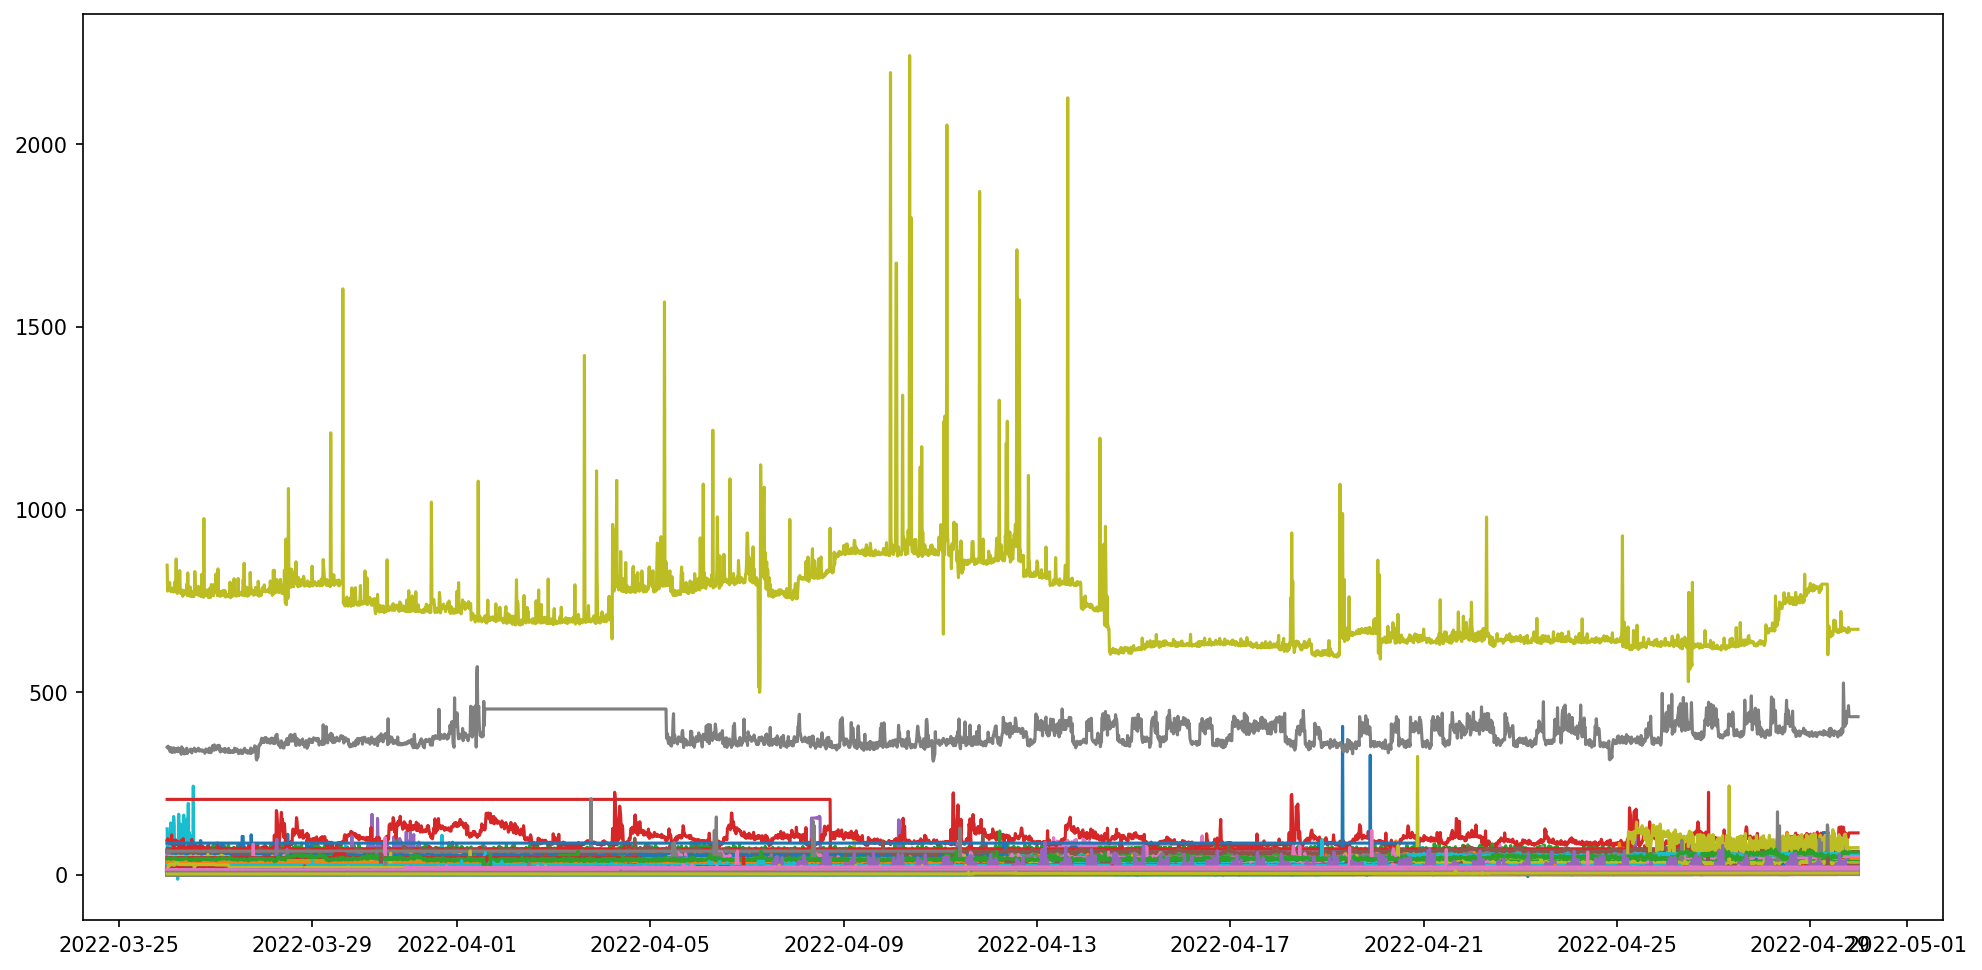

In [617]:
plt.figure(figsize=(16, 8), dpi=150)
for cluster_id, df in hub_cluster_full_data.groupby('cluster_id'):
    plt.plot(df['timestamp'],df['cpu_usage'],label='line')
plt.show()

In [608]:
managed_cluster_full_data.to_csv("./datasets/managed_cluster_full_data.csv",index=False)

In [666]:
hub_cluster_full_data.to_csv("./datasets/hub_cluster_full_data.csv",index=False)

In [739]:
managed_cluster_memo_full_data.to_csv("./datasets/managed_cluster_full_memo_data.csv",index=False)

In [740]:
hub_cluster_memo_full_data.to_csv("./datasets/hub_cluster_full_memo_data.csv",index=False)

In [657]:
managed_cluster_full_data['is_managed'] = 1

In [ ]:
hub_cluster_full_data['is_managed'] = 0

In [ ]:
managed_cluster_full_data.timestamp = pd.to_datetime(managed_cluster_full_data.timestamp, infer_datetime_format=True)  

In [670]:
hub_cluster_full_data.timestamp = pd.to_datetime(hub_cluster_full_data.timestamp, infer_datetime_format=True)  

In [671]:
managed_cluster_full_data['date'] = managed_cluster_full_data['timestamp'].dt.date

In [672]:
hub_cluster_full_data['date'] = hub_cluster_full_data['timestamp'].dt.date

In [673]:
all_clusters_cpu_data = pd.concat([managed_cluster_full_data,hub_cluster_full_data],ignore_index=True)

In [725]:
all_clusters_memo_data = pd.concat([managed_cluster_memo_full_data,hub_cluster_memo_full_data])

In [734]:
all_clusters_memo_data.timestamp = pd.to_datetime(all_clusters_memo_data.timestamp, infer_datetime_format=True)  

In [735]:
all_clusters_memo_data['date'] = all_clusters_memo_data['timestamp'].dt.date

In [818]:
all_clusters_api_data = pd.concat([managed_cluster_api_full_data,hub_cluster_api_full_data])

In [820]:
all_clusters_api_data.timestamp = pd.to_datetime(all_clusters_api_data.timestamp, infer_datetime_format=True)  

In [821]:
all_clusters_api_data['date'] = all_clusters_api_data['timestamp'].dt.date

In [728]:
len(all_clusters_cpu_data['cluster_id'].unique())

6693

In [727]:
len(all_clusters_memo_data['cluster_id'].unique())

6699

In [822]:
len(all_clusters_api_data['cluster_id'].unique())

6521

In [ ]:
all_clusters_cpu_data.to_csv("./datasets/all_clusters_full_data.csv",index=False)

In [750]:
all_clusters_cpu_data.head()

,timestamp,cpu_usage,cluster_id,date,is_managed
0,2022-03-26 00:00:00,12.431807,00074511-2e63-4d75-9937-3495d5595b4f,2022-03-26,1.0
1,2022-03-26 00:15:00,12.800566,00074511-2e63-4d75-9937-3495d5595b4f,2022-03-26,1.0
2,2022-03-26 00:30:00,12.242775,00074511-2e63-4d75-9937-3495d5595b4f,2022-03-26,1.0
3,2022-03-26 00:45:00,12.501267,00074511-2e63-4d75-9937-3495d5595b4f,2022-03-26,1.0
4,2022-03-26 01:00:00,12.275675,00074511-2e63-4d75-9937-3495d5595b4f,2022-03-26,1.0


In [278]:
# Total Avg of Cpu
# Min of the cluster cpu usage
# Max of the cluster cpu usage
# Top 5 Min AVG cpu usage
# Top 5 Max AVG cpu usage

In [674]:
def generate_features(current_list):
    #print(current_list)
    current_list.sort()
    metric_max = max(current_list)
    metric_min = min(current_list)
    metric_avg = sum(current_list)/len(current_list)
    top_5_min_avg = sum(current_list[:5])/5
    top_5_max_avg = sum(current_list[-5:])/5
    min_max_diff = metric_max - metric_min
    min_max_5_diff = top_5_max_avg - top_5_min_avg
    return [ metric_max, metric_min, metric_avg, top_5_max_avg, top_5_min_avg, min_max_diff, min_max_5_diff]

In [825]:
#single day avg
feature_map = {}
duration = 'daily'
metric = 'api_server_count'
for cluster_id, current_df1 in all_clusters_api_data.groupby('cluster_id'):
    daily_avg_list = []
    for date, current_df2 in current_df1.groupby('date'):
        current_list = current_df2[metric].to_list()
        metric_avg = sum(current_list)/len(current_list)
        daily_avg_list.append(metric_avg)
    features_generated = [cluster_id]
    features_generated.extend(generate_features(daily_avg_list))
    feature_map[cluster_id] = features_generated
new_df = pd.DataFrame(feature_map.values(),columns=['cluster_id',duration+'_'+metric+'_max', duration+'_'+metric+'_min', duration+'_'+metric+'_avg', duration+'_'+metric +'_top_5_max_avg',
                                    duration+'_'+metric +'_top_5_min_avg', duration+'_'+metric +'_min_max_diff', duration+'_'+metric +'_min_max_5_diff'])


In [826]:
#7 day avg
feature_map = {}
duration = 'weekly'
metric = 'api_server_count'
columns = [duration+'_'+metric+'_max', duration+'_'+metric+'_min', duration+'_'+metric+'_avg', duration+'_'+metric +'_top_5_max_avg',
                                    duration+'_'+metric +'_top_5_min_avg', duration+'_'+metric +'_min_max_diff', duration+'_'+metric +'_min_max_5_diff']
for cluster_id, current_df1 in all_clusters_api_data.groupby('cluster_id'):
    daily_avg_list = []
    weekly_avg_list = []
    for date, current_df2 in current_df1.groupby('date'):
        current_list = current_df2[metric].to_list()
        metric_avg = sum(current_list)/len(current_list)
        daily_avg_list.append(metric_avg)
    start = 0
    end = 7
    times = len(daily_avg_list) // 7
    for _ in range(times):
        weekly_list = daily_avg_list[start:end]
        week_avg = sum(weekly_list)/len(weekly_list)
        weekly_avg_list.append(week_avg)
        start += 7
        end += 7
    features_generated = []
    features_generated.extend(generate_features(weekly_avg_list))
    feature_map[cluster_id] = features_generated
new_df_weekly = pd.DataFrame(feature_map.values(),columns=columns)

In [824]:
#all_days(35) avg
new_list = []
duration = 'all'
metric = 'api_server_count'
columns = [duration+'_'+metric+'_max', duration+'_'+metric+'_min', duration+'_'+metric+'_avg', duration+'_'+metric +'_top_5_max_avg',
                             duration+'_'+metric +'_top_5_min_avg', duration+'_'+metric +'_min_max_diff', duration+'_'+metric +'_min_max_5_diff']
for cluster_id, current_df1 in all_clusters_api_data.groupby('cluster_id'):
        current_list = current_df1[metric].to_list()
        features_generated = []
        features_generated.extend(generate_features(current_list))
        new_list.append(features_generated)
new_df_monthly = pd.DataFrame(new_list,columns=columns)

In [827]:
all_cluster_features_api = pd.concat([new_df,new_df_weekly,new_df_monthly],axis=1)

In [747]:
all_cluster_features_memo = pd.concat([new_df,new_df_weekly,new_df_monthly],axis=1)

In [754]:
all_cluster_features_cpu = pd.concat([new_df,new_df_weekly,new_df_monthly],axis=1)

In [749]:
all_cluster_features_memo.shape

(6699, 22)

In [729]:
all_cluster_features.head()

,cluster_id,daily_cpu_max,daily_cpu_min,daily_cpu_avg,daily_cpu_top_5_max_avg,daily_cpu_top_5_min_avg,daily_cpu_min_max_diff,daily_min_max_5_diff,weekly_cpu_max,weekly_cpu_min,...,weekly_cpu_top_5_min_avg,weekly_cpu_min_max_diff,weekly_min_max_5_diff,all_metric_max,all_metric_min,all_metric_avg,all_top_5_max_avg,all_top_5_min_avg,all_min_max_diff,all_min_max_5_diff
0,00074511-2e63-4d75-9937-3495d5595b4f,14.372993,10.404357,12.079505,14.372993,10.643266,3.968636,3.729727,13.927668,10.980816,...,12.079505,2.946852,0.0,20.230447,7.610190,12.079505,19.780241,7.743610,12.620256,12.036631
1,0007753d-3cdc-4c4f-bdb5-c57b3715b55f,14.110800,6.084808,6.813905,8.913873,6.221226,8.025992,2.692646,7.867560,6.316194,...,6.813905,1.551366,0.0,22.638793,5.325333,6.813905,21.364978,5.339086,17.313460,16.025892
2,00087096-b4e4-4629-ac95-045be2a290b2,11.217699,1.735580,6.192929,11.217699,2.765804,9.482120,8.451895,11.217699,2.854458,...,6.192929,8.363241,0.0,11.217699,1.262286,6.192929,11.217699,1.285562,9.955414,9.932137
3,000c0ac3-edc8-400a-8c50-a4f18b67399a,3.476095,3.044000,3.119607,3.476095,3.044000,0.432095,0.432095,3.422033,3.044000,...,3.119607,0.378033,0.0,3.774952,2.573429,3.119607,3.595638,2.596571,1.201524,0.999067
4,000d2841-9449-494e-9ff7-5eeea283ff5c,7.102631,2.957143,4.184704,7.099383,2.957143,4.145488,4.142240,7.098571,2.957143,...,4.184704,4.141429,0.0,9.502571,2.818000,4.184704,8.185414,2.889562,6.684571,5.295852


In [755]:
all_cluster_features_cpu.head()

,cluster_id,daily_cpu_usage_max,daily_cpu_usage_min,daily_cpu_usage_avg,daily_cpu_usage_top_5_max_avg,daily_cpu_usage_top_5_min_avg,daily_cpu_usage_min_max_diff,daily_cpu_usage_min_max_5_diff,weekly_cpu_usage_max,weekly_cpu_usage_min,...,weekly_cpu_usage_top_5_min_avg,weekly_cpu_usage_min_max_diff,weekly_cpu_usage_min_max_5_diff,all_cpu_usage_max,all_cpu_usage_min,all_cpu_usage_avg,all_cpu_usage_top_5_max_avg,all_cpu_usage_top_5_min_avg,all_cpu_usage_min_max_diff,all_cpu_usage_min_max_5_diff
0,00074511-2e63-4d75-9937-3495d5595b4f,14.372993,10.404357,12.079505,14.372993,10.643266,3.968636,3.729727,13.927668,10.980816,...,12.079505,2.946852,0.0,20.230447,7.610190,12.079505,19.780241,7.743610,12.620256,12.036631
1,0007753d-3cdc-4c4f-bdb5-c57b3715b55f,14.110800,6.084808,6.813905,8.913873,6.221226,8.025992,2.692646,7.867560,6.316194,...,6.813905,1.551366,0.0,22.638793,5.325333,6.813905,21.364978,5.339086,17.313460,16.025892
2,00087096-b4e4-4629-ac95-045be2a290b2,11.217699,1.735580,6.192929,11.217699,2.765804,9.482120,8.451895,11.217699,2.854458,...,6.192929,8.363241,0.0,11.217699,1.262286,6.192929,11.217699,1.285562,9.955414,9.932137
3,000c0ac3-edc8-400a-8c50-a4f18b67399a,3.476095,3.044000,3.119607,3.476095,3.044000,0.432095,0.432095,3.422033,3.044000,...,3.119607,0.378033,0.0,3.774952,2.573429,3.119607,3.595638,2.596571,1.201524,0.999067
4,000d2841-9449-494e-9ff7-5eeea283ff5c,7.102631,2.957143,4.184704,7.099383,2.957143,4.145488,4.142240,7.098571,2.957143,...,4.184704,4.141429,0.0,9.502571,2.818000,4.184704,8.185414,2.889562,6.684571,5.295852


In [756]:
all_cluster_features_cpu.to_csv("./datasets/cluster_features_cpu.csv",index=False)

In [690]:
all_cluster_features_memo.to_csv("./datasets/cluster_features_memo.csv",index=False)

In [830]:
all_cluster_features_api.to_csv("./datasets/cluster_features_api.csv",index=False)

In [689]:
all_cluster_features.shape

(6693, 22)